# 資料出處:https://blog.csdn.net/Cy_coding/article/details/113840883

In [2]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense, Conv2D, Conv2DTranspose, MaxPooling2D, Flatten, UpSampling2D, Reshape
from tensorflow.keras.models import Model,Sequential
import numpy as np
import matplotlib.pyplot as plt

加載數據並對mnist圖像數據進行預處理<br>
包括正則化以及將圖片擴充成28，28，1的三維。<br>

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 正則化的部分
x_train=x_train.astype('float32')/float(x_train.max())
x_test=x_test.astype('float32')/float(x_test.max())
#擴充成3維的部分
x_train=x_train.reshape(len(x_train),x_train.shape[1], x_train.shape[2], 1)
x_test=x_test.reshape(len(x_test),x_test.shape[1], x_test.shape[2], 1)



神經網路的部分<br>
都由兩層捲積所構成<br>
編碼器的池化層對應解碼器的UpSampling2D<br>
所以輸入輸出的維度是一致的<br>
而編碼器會將原圖做兩次捲積，得到的值就是我們的壓縮。<br>
由於還原回去的圖不會和原圖一樣，這是一種失真壓縮。

In [3]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# 編碼器
input_img = Input(shape=(28,28,1))
x = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size=(2,2))(x)
encoded = Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(x)


# 解碼器
x = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D(size=(2,2))(x)
decoded = Conv2D(filters=1,kernel_size=(3,3), activation='sigmoid', padding='same')(x)

autoencodeur = Model(input_img, decoded)
autoencodeur.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 1)         145   

In [4]:


autoencodeur.compile(optimizer='Adam',loss='binary_crossentropy')
autoencodeur.fit(x_train, x_train, batch_size=256, epochs=5)


Epoch 1/5
235/235 [==============================] - 37s 152ms/step - loss: 0.1655
Epoch 2/5
235/235 [==============================] - 36s 153ms/step - loss: 0.0701
Epoch 3/5
235/235 [==============================] - 38s 161ms/step - loss: 0.0673
Epoch 4/5
235/235 [==============================] - 37s 159ms/step - loss: 0.0661
Epoch 5/5
235/235 [==============================] - 37s 157ms/step - loss: 0.0653


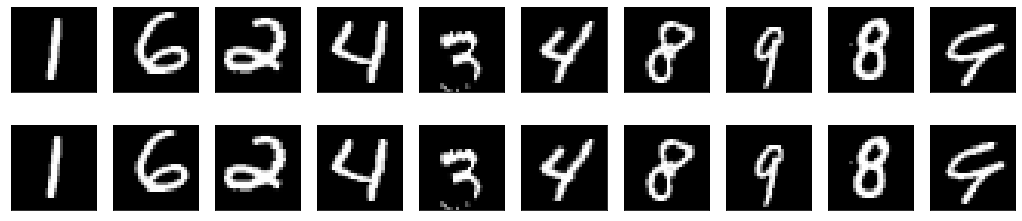

In [5]:
def MNIST_AE_disp(img_in, img_out, img_idx):

    num_img = len(img_idx)
    plt.figure(figsize=(18, 4))

    for i, image_idx in enumerate(img_idx):
        # 顯示輸入圖像
        ax = plt.subplot(2, num_img, i + 1)
        plt.imshow(img_in[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 顯示輸出圖像
        ax = plt.subplot(2, num_img, num_img + i + 1)
        plt.imshow(img_out[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
# 挑選十個隨機圖片
num_images=10
np.random.seed(42)
random_test_images=np.random.randint(x_test.shape[0], size=num_images)
# 預測輸出的圖片
decoded_img=autoencodeur.predict(x_test)
# print(decoded_img.shape)
# 顯示並對比輸出圖片
MNIST_AE_disp(x_test,decoded_imgt, random_test_images)